# Lab 2: Classification Using KNN and RNN Algorithms MSCS 634
**Name:** Milan Bista  
**Course:** MSCS 634 - Data Science  
**Assignment:** Lab 2: Classification Using KNN and RNN Algorithms
**Date:** 6/14/2025

## Lab Overview
This lab will explore the performance of K-Nearest Neighbors (KNN) and Radius Neighbors (RNN) classifiers using the Wine Dataset from sklearn Python library.

## Dataset Information
- **Source:** Wine Dataset from sklearn Python library


In [8]:
# Step 1: Load and Prepare Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic Exploration
print("Features:", wine.feature_names)
print("Target Classes:", np.unique(y))
print("Class Distribution:", pd.Series(y).value_counts())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: [0 1 2]
Class Distribution: 1    71
0    59
2    48
dtype: int64


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"KNN Accuracy (k={k}): {acc:.4f}")


KNN Accuracy (k=1): 0.7778
KNN Accuracy (k=5): 0.8056
KNN Accuracy (k=11): 0.8056
KNN Accuracy (k=15): 0.8056
KNN Accuracy (k=21): 0.8056


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsClassifier

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

radius_values = [5,350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label='most_frequent')
    rnn.fit(X_train_scaled, y_train)
    y_pred = rnn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"RNN Accuracy (radius={r}): {acc:.4f}")


RNN Accuracy (radius=5): 0.8611
RNN Accuracy (radius=350): 0.3889
RNN Accuracy (radius=400): 0.3889
RNN Accuracy (radius=450): 0.3889
RNN Accuracy (radius=500): 0.3889
RNN Accuracy (radius=550): 0.3889
RNN Accuracy (radius=600): 0.3889


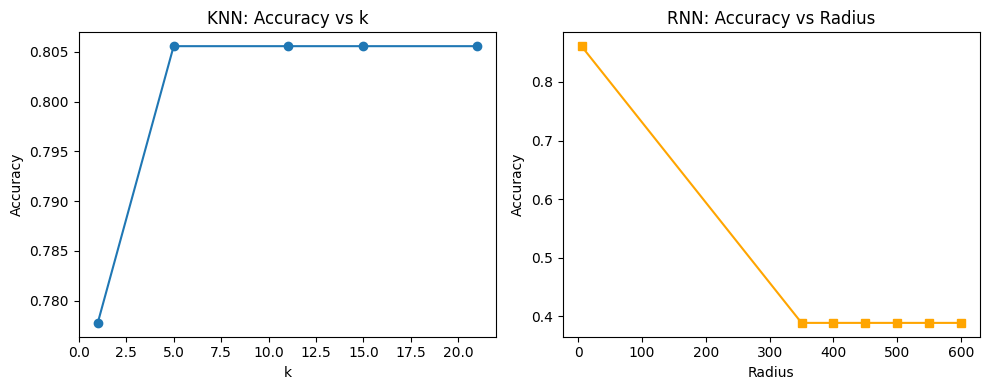

In [11]:
import matplotlib.pyplot as plt

# Plot for KNN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN: Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Plot for RNN
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='s', color='orange')
plt.title('RNN: Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
